In [60]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

goog = pdr.get_data_yahoo('GOOG', start='2009-03-14', end='2014-04-14')

[*********************100%%**********************]  1 of 1 completed


In [55]:
import numpy as np

In [56]:
import pandas as pd

In [61]:
goog.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-07,26.962973,27.348913,26.285334,26.833828,26.833828,88033033
2014-04-08,27.055719,27.674021,27.006353,27.669035,27.669035,63024560
2014-04-09,27.904388,28.191101,27.571802,28.129770,28.129770,66616395
2014-04-10,28.172651,28.172651,26.921087,26.973444,26.973444,80737057
2014-04-11,26.554594,26.926073,26.254417,26.457361,26.457361,78496923


In [62]:
goog['LogRet'] = np.log(goog['Close'] / goog['Close'].shift(1))

In [63]:
goog['Volatility'] = goog['LogRet'].rolling(252).std()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

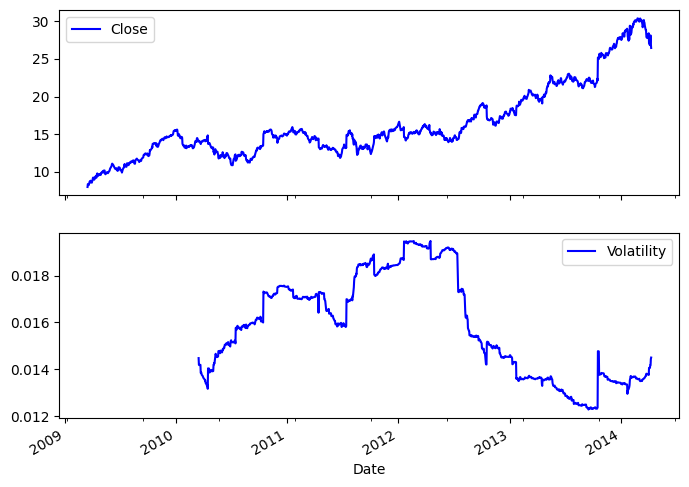

In [64]:
goog[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8,6))

In [65]:
import pandas_datareader.data as web

In [69]:
import datetime as dt

In [70]:
start=dt.datetime(2000, 1, 1)

In [72]:
sp500 = pdr.get_data_yahoo('^GSPC', start='2000-01-01', end='2014-04-14')

[*********************100%%**********************]  1 of 1 completed


In [73]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3591 entries, 2000-01-03 to 2014-04-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3591 non-null   float64
 1   High       3591 non-null   float64
 2   Low        3591 non-null   float64
 3   Close      3591 non-null   float64
 4   Adj Close  3591 non-null   float64
 5   Volume     3591 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.4 KB


<Axes: xlabel='Date'>

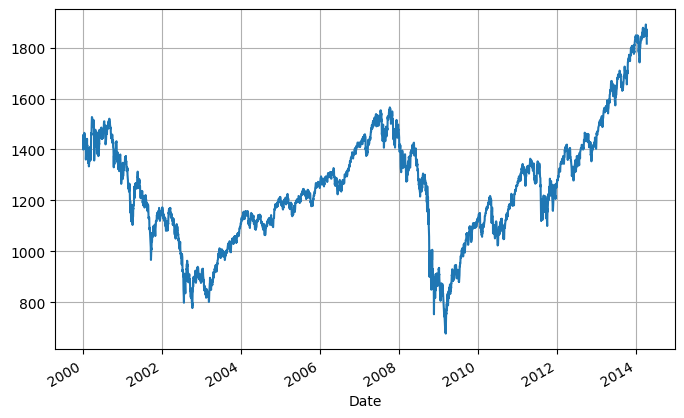

In [74]:
sp500['Close'].plot(grid=True, figsize=(8, 5))

In [75]:
sp500['42d'] = np.round(sp500['Close'].rolling(42).mean(), 2)
sp500['252d'] = np.round(sp500['Close'].rolling(252).mean(), 2)